In [1]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
len_min = 3

In [3]:
disease = 'autism'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-10-28-7-42-17' 

data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    sub_len = []
    for r in rd:
        sub_len.append(len(r[1::]))
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [4]:
print("The average number of tokens for each time slot of N days is {0:.2f}".format(np.mean(sub_len)))

The average number of tokens for each time slot of N days is 6.22


(array([2.44578e+05, 1.50740e+04, 4.53900e+03, 2.42700e+03, 1.26600e+03,
        5.36000e+02, 2.28000e+02, 9.30000e+01, 1.80000e+01, 9.00000e+00]),
 array([  1. ,  14.9,  28.8,  42.7,  56.6,  70.5,  84.4,  98.3, 112.2,
        126.1, 140. ]),
 <a list of 10 Patch objects>)

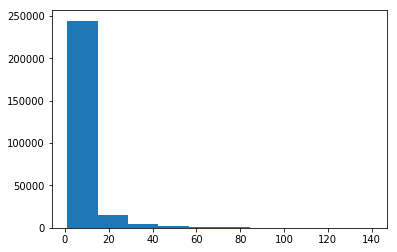

In [5]:
plt.hist(sub_len)

In [6]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
print("The average length of ehr sequences is: {0:.2f}".format(np.mean(l)))

The average length of ehr sequences is: 117.28


In [7]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

619 of 14249 patients have less than 3 records


In [8]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 3609


(array([9.816e+03, 2.030e+03, 9.890e+02, 5.090e+02, 3.290e+02, 1.560e+02,
        1.050e+02, 7.900e+01, 5.700e+01, 4.300e+01, 3.300e+01, 1.900e+01,
        1.900e+01, 1.400e+01, 9.000e+00, 3.000e+00, 1.100e+01, 3.000e+00,
        8.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.01222222e+02, 2.01444444e+02, 3.01666667e+02,
        4.01888889e+02, 5.02111111e+02, 6.02333333e+02, 7.02555556e+02,
        8.02777778e+02, 9.03000000e+02, 1.00322222e+03, 1.10344444e+03,
        1.20366667e+03, 1.30388889e+03, 1.40411111e+03, 1.50433333e+03,
        1.60455556e+03, 1.70477778e+03, 1.80500000e+03, 1.90522222e+03,
        2.00544444e+03, 2.10566667e+03, 2.20588889e+03, 2.30611111e+03,
        2.40633333e+03, 2.50655556e+03, 2.60677778e+03, 2.70700000e+03,
        2.80722222e+03, 2.90744444e+03, 3.00766667

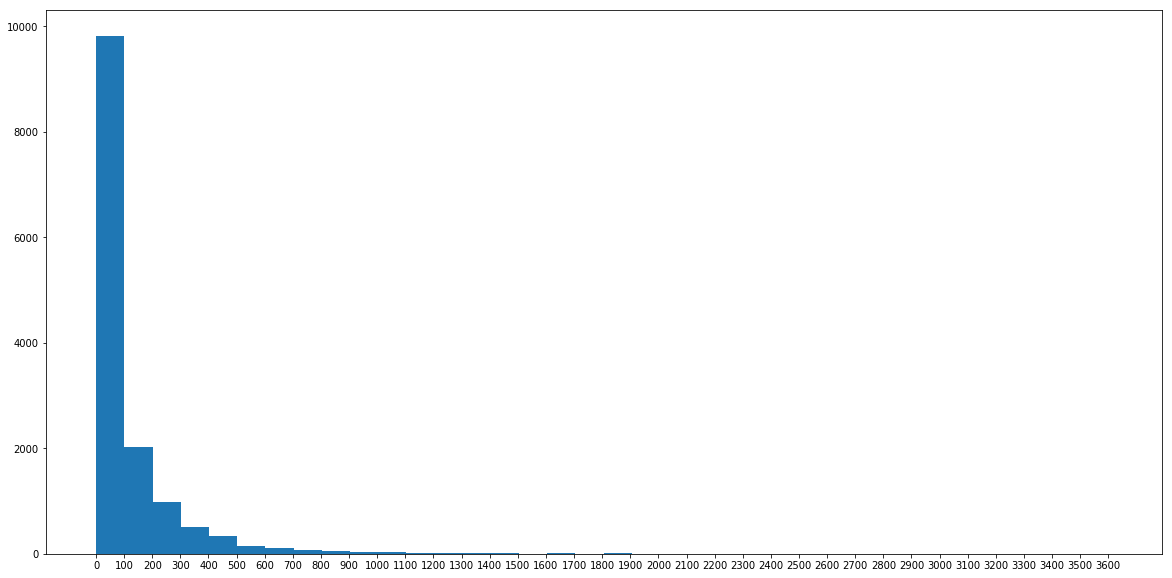

In [9]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36)

In [10]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [11]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 619 out of 14249 patients
